## Credit Card Fraud Detection using KNN, Decision Tree, Random Forest and Logistic Regression

In this project I have compared various classification models to check which model gives the best result.

Models were built on the imbalanced data and hyperparameters were tuned. Then SMOTE and ADASYN techniques were used to balance the data. Models was tried on both SMOTE and ADASYN data to see which one is producing better result.

Used the following classification models.

* Logistic Regression
* KNN
* Decision Tree
* Random forest


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

## Exploratory data analysis

In [4]:
df = pd.read_csv('C:/Users/sivak/OneDrive/Desktop/ML/Code/ExampleCode/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.shape


(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Insight:**
* Since the data is PCA transformed all features are expected tobe normally distributed. The data does not have any null value. Each feature has 284807 observations.
* The datatype of the 'Class' variable is int. Since we know that the Class vaiable should be categorical (0: non fraud & 1:fraud), we must change the datatype.

In [7]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [9]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


The data is imbalanced. Only 0.172% of total cases are positive. 

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


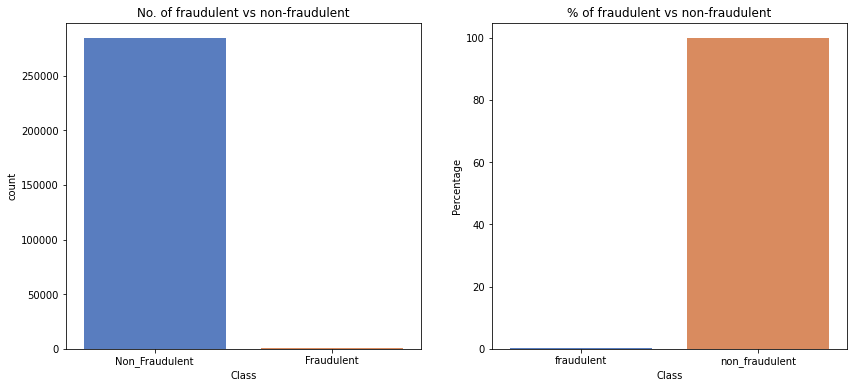

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.set_palette("muted")
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot('Class',data=df)
plt.title('No. of fraudulent vs non-fraudulent')

plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()


The no. of fraudulent cases are quite insignificant compared to the non-fraudulent cases. This is a highly unbalnced dataset.

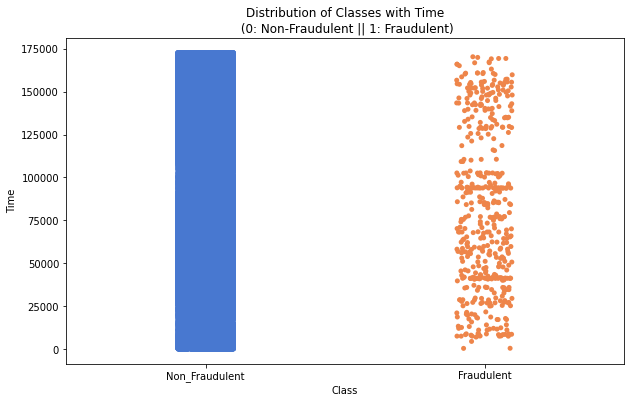

In [11]:
# Create a scatter plot to observe the distribution of classes with time
#sns.set_palette("muted")
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()


**Insight:**
*   From the above plot we observe that there isn't any
particular time interval at which fraudulent transactions happen. It can happen at any time. 
* The Time column is evenly distributed for fraudulent transactions and doesn't seem to have any role in deciding whether a transaction is fraud or not.

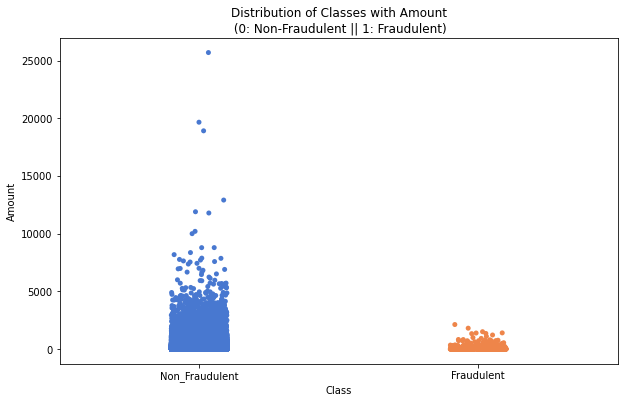

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

**Insight:** 

*   The fraudulent transactions do not have any high amount transactions. The maximum amount for a fraudulent transaction is somewhere around $2500. 
 



In [13]:
# Drop unnecessary columns
# Dropping the column 'Time' since it does not have any impact on deciding a fraud transaction

df=df.drop('Time',axis=1)
df.shape

(284807, 30)

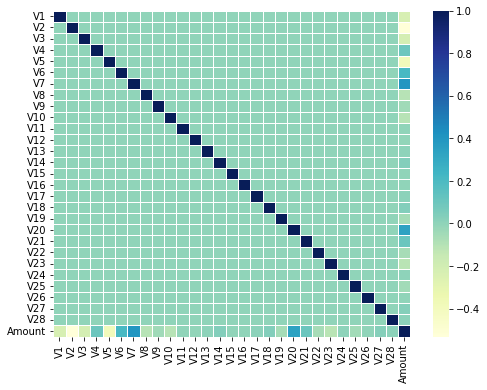

In [14]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

* V7 and V20 seem to have positive correlation with the feature 'Amount'. Since this is a PCA converted data, there isn't much to conclude from the heatmap.

### Splitting the data into train & test data

In [15]:
y= df.iloc[:,-1] #class variable
X = df.iloc[:,:-1]


In [16]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

#Using stratify=y so that proportion of each class is same in both train and test set

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


### Plotting the distribution of a variable

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

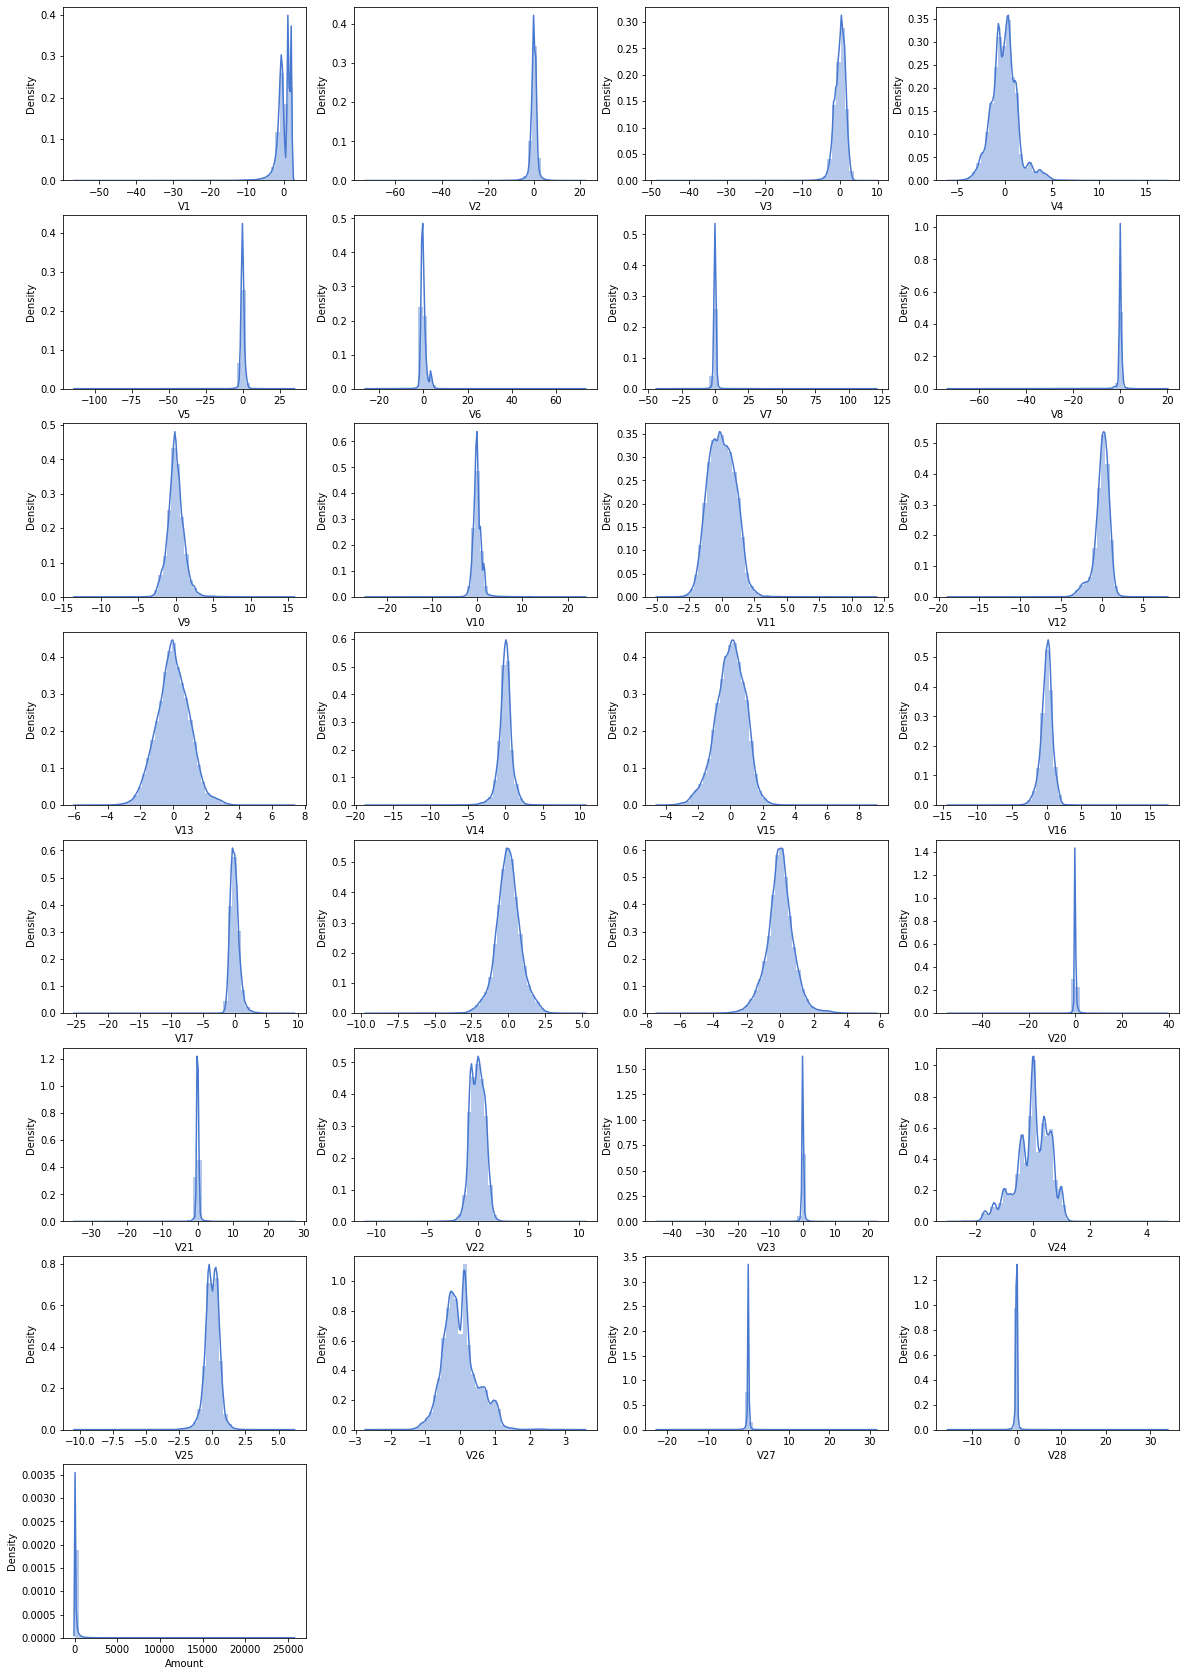

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
# ploting distribution plot for all columns to check the skewness

#Loop for creating distplot.

collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()




**Insight:**


*   We plotted distribution plots for all the variables and it is clearly that there are some variables which are skewed either towards left or right.
*   This means all variables are not normally distributed as expected even if this is a PCA transformed dataset.

* We must transform the data to remove the skewness.



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Using ‘yeo-johnson’ method since it works with positive and negative values. It is used to improve normality or symmetry


from sklearn.preprocessing import power_transform

X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [20]:
# Converting X_train & X_test back to dataframe
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

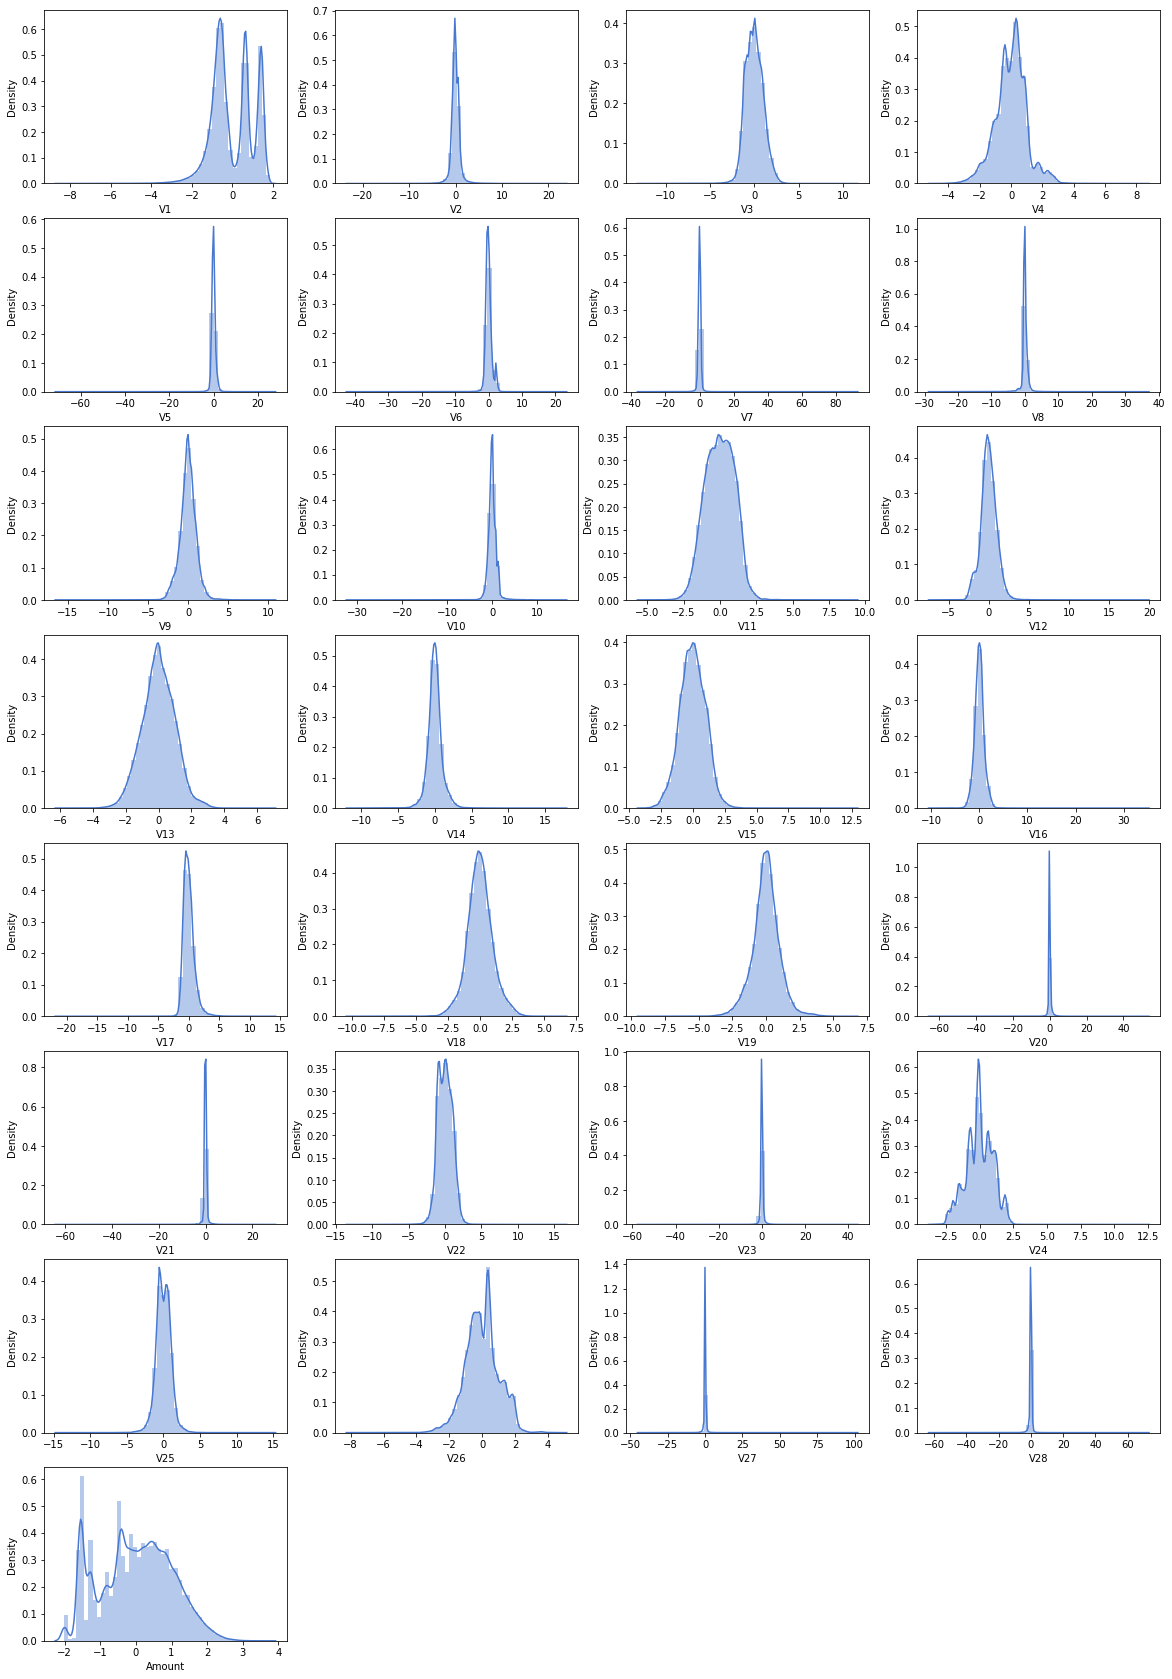

In [21]:
# plot the histogram of a variable from the dataset again to see the result 
# Plotting same set of variables as earlier to identify the difference.

#Loop for creating distplot.

collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()



**Insight:**


*   After the Power transformation the variables are more gaussian like.
*   Changes in V1, V12, V26 and Amount coulmn are quite evident. Skewness has been removed to some extent.



### **Model performance parameter:**


*   We will use ROC curve and find AUC Score as the performance matrix for the models.
*  ROC curve meausres the performance of the model at different thresholds which will help us find the optimum threshold for the model.



In [22]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc


## Model Building on the imbalanced dataset


**Note**:
- Due to time constraint we have choosen few parameters to tune in each model.

- For cross validation, GridsearchCV and Stratified Kfold (cross_val_score) has been used.

### Logistic Regression

In [23]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV


In [24]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[ 0.05827245 -0.03231278  0.15258413 -0.2303827  -0.03251785  0.04418223
   0.06092596  0.1053219   0.11901376  0.23577848 -0.17897772  0.23620764
   0.0429589   0.40046756  0.01684527  0.118289    0.11039617  0.00086577
   0.00221737 -0.01263307 -0.02883974 -0.03215089  0.03304381  0.02416244
   0.00155655 -0.01639013 -0.00758294  0.00107762  0.01629961]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9988939995084443

C: 0.01
Coefficient of each feature: [[ 0.15546705  0.08584789  0.26579153 -0.5753725  -0.01738138 -0.03487857
   0.11891721  0.19132465  0.16632621  0.22402918 -0.16014372  0.44675414
   0.14777179  0.65203773  0.11114447  0.20586739  0.02118281 -0.0613255
   0.05790786  0.00283988 -0.04986379 -0.1719924   0.0859131  -0.00722106
  -0.04617946 -0.0330326   0.05303883  0.03400267 -0.00360083]]
Training accuracy: 0.999223156092958
Test accuracy: 0.9990695551420246

C: 0.1
Coefficient of each feature: [[ 0.21452937  0.22263954



*   The best C value is the one for which the difference between train and test score is the least.
*   In our case the best value of C=0.1



In [25]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning



#print the optimum value of hyperparameters

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005




*   Best parameters :  {'C': 0.01, 'penalty': 'l2'}




AUC: 0.98


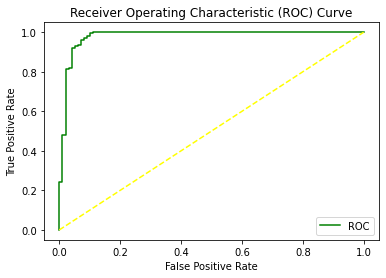

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [26]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)



*   The AUC score is 0.98 but the data is clearly overfitting due to the imbalanced data.




### KNN

In [27]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [28]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


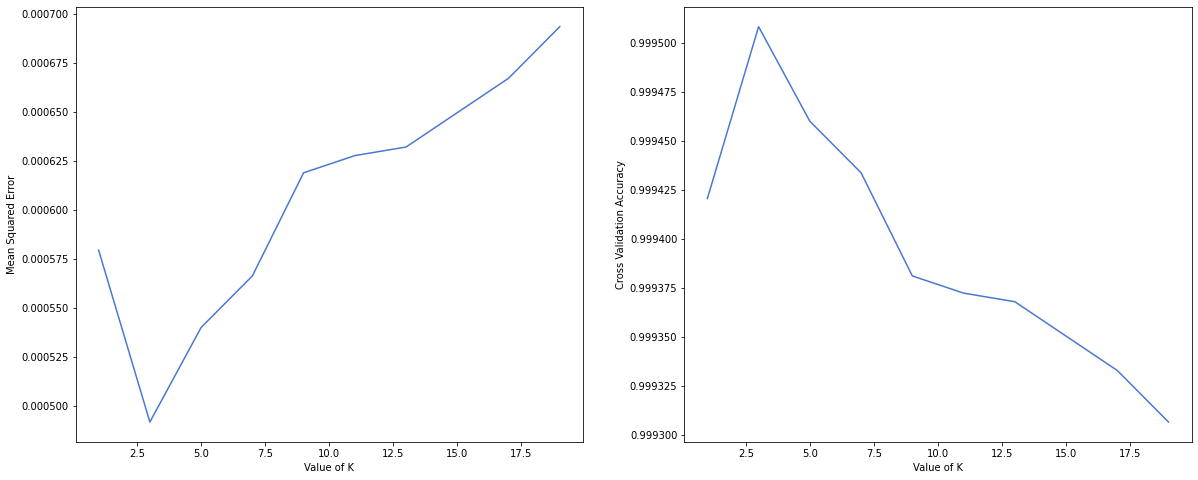

In [29]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()





*   From the above plot optimum K value is 3 for KNN





In [30]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)



AUC: 0.94


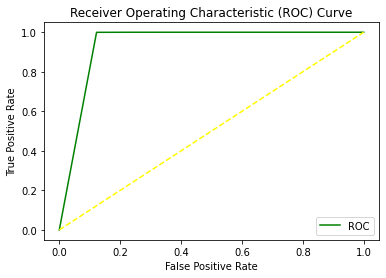

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.938721047999954

In [31]:
# Checking AUC 

clf_score(knn_clf)


* The KNN model with imbalanced data gives AUC of 0.94  which is pretty good but recall is 0.77 which is the score we should look to improve in this case.

### Decision Tree

In [32]:
#importing libraries

from sklearn import tree
from pprint import pprint


In [33]:
# 5 fold cross validation for getting best parameter

depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990783207882552, 0.9992889903223684, 0.9993197129627598, 0.9994382145756984, 0.9994733261647172, 0.9994601593188351, 0.9994513814215804, 0.9994338256270708, 0.9993855471921702, 0.9994118808839343, 0.9993811582435427, 0.9993504356031512, 0.9993109350655051, 0.9993021571682504, 0.9992758234764862, 0.9992933792709955, 0.9992802124251134, 0.9992407118874673, 0.9992494897847222]


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


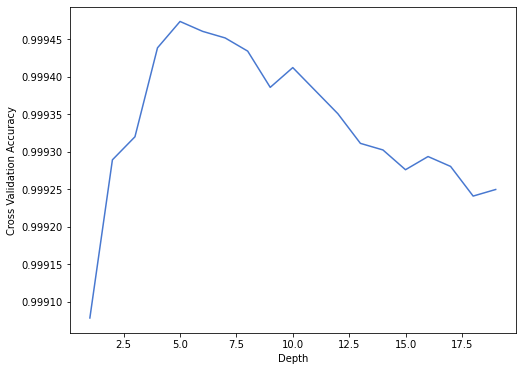

In [34]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()



* The score for depth=5 is the highest. We will use this in our model.




AUC: 0.88


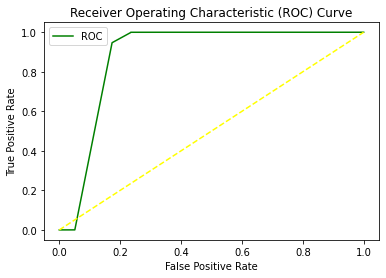

                precision    recall  f1-score   support

    Fraudulent       0.91      0.71      0.80        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.95      0.86      0.90     56962
  weighted avg       1.00      1.00      1.00     56962



0.8828204853973103

In [35]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

#Plotting ROC
clf_score(dt_clf)

* The AUC score for decision tree is only 0.88 which is not satisfactory. The precison and recall are also lower than KNN and logistic regression model.

### Random Forest Classifier

In [36]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [37]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 40}
accuracy : 0.9779981215285893


* We will use these parameters for Random forest  {'max_depth': 9, 'n_estimators': 30}. The Accuracy is 0.97 which is very good.

AUC: 0.96


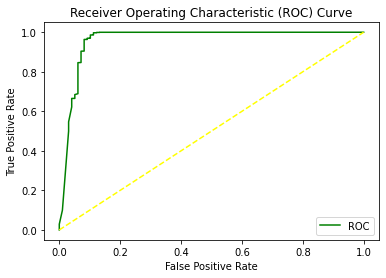

                precision    recall  f1-score   support

    Fraudulent       0.97      0.74      0.84        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.87      0.92     56962
  weighted avg       1.00      1.00      1.00     56962



0.9618439771800672

In [38]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)


* We are getting very good precision(0.97) for Faudulent class which is very good along with the AUC of 0.97

## Handling Class Imbalance

* We will use two balancing techniques, SMOTE & ADASYN.
* In SMOTE a subset of data is taken from the minority class as an example and then new synthetic similar instances are created.
* ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.



#### Class balancing with **SMOTE**:

In [41]:
#importing SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

Using TensorFlow backend.


In [42]:
#CHecking shape and class count after smote
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_sm))
print(X_sm.shape)
print(y_sm.shape)

Resampled dataset shape Counter({'Non_Fraudulent': 227451, 'Fraudulent': 227451})
(454902, 29)
(454902,)


* As seen above the count of each class is same after SMOTE resampling.

#### Class balancing with **ADASYN**:

In [43]:
# importing ADASYN

from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

In [44]:
# CHecking shape and class count after ADASYN
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_ada))
print(X_ada.shape)
print(y_ada.shape)

Resampled dataset shape Counter({'Fraudulent': 227474, 'Non_Fraudulent': 227451})
(454925, 29)
(454925,)


## Model Building with Balanced data
- We will use our tuned models which was built on imbalanced data, with both SMOTE and ADASYN technique and see which one gives the best result.

### Logistic Regression

#### Logistic regression with SMOTE

AUC: 0.98


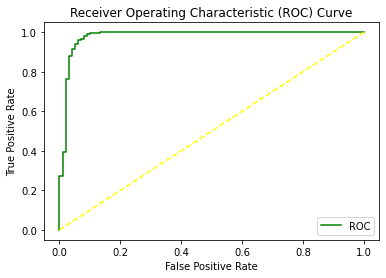

                precision    recall  f1-score   support

    Fraudulent       0.06      0.92      0.10        98
Non_Fraudulent       1.00      0.97      0.99     56864

      accuracy                           0.97     56962
     macro avg       0.53      0.95      0.54     56962
  weighted avg       1.00      0.97      0.98     56962



0.9800496063647742

In [45]:
# Using the best parameters that we got from the cross validation on imbalanced data.

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_sm = lsr_best.fit(X_sm,y_sm)

# Printing ROC curve and accuracy scores
clf_score(lsr_sm)

#### Logistic regression with ADASYN

AUC: 0.98


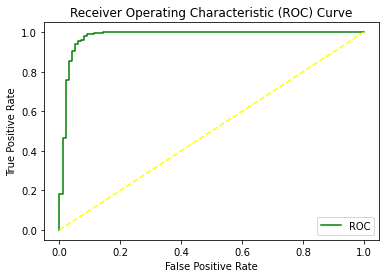

                precision    recall  f1-score   support

    Fraudulent       0.02      0.95      0.03        98
Non_Fraudulent       1.00      0.91      0.95     56864

      accuracy                           0.91     56962
     macro avg       0.51      0.93      0.49     56962
  weighted avg       1.00      0.91      0.95     56962



0.9793230249331022

In [46]:
lsr_ada = lsr_best.fit(X_ada,y_ada)

# Printing ROC curve and accuracy scores
clf_score(lsr_ada)

- AUC & Recall both are better on SMOTE. 
- But the f1-score is extremely low. Model is overfitting.

### K-Nearest Neighbours

#### KNN on SMOTE

AUC: 0.94


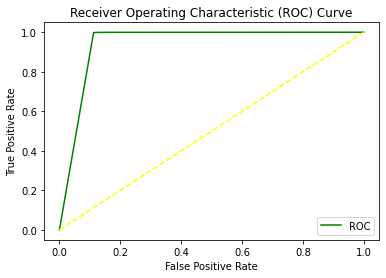

                precision    recall  f1-score   support

    Fraudulent       0.60      0.88      0.71        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.80      0.94      0.86     56962
  weighted avg       1.00      1.00      1.00     56962



0.9435653130132188

In [47]:
# KNN with SMOTE re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(X_sm,y_sm)

#Printing ROC 

clf_score(knn_sm)

#### KNN on ADASYN

AUC: 0.94


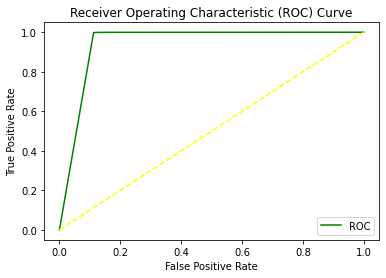

                precision    recall  f1-score   support

    Fraudulent       0.60      0.88      0.71        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.80      0.94      0.86     56962
  weighted avg       1.00      1.00      1.00     56962



0.9435653130132188

In [48]:
# KNN with ADASYN re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_ada = knn.fit(X_ada,y_ada)

#Printing ROC 

clf_score(knn_ada)

- KNN gives same recall(0.88) on both SMOTE and ADASYN.
- But on SMOTE, the AUC & f1-score are slightly better. So, KNN performs better on SMOTE. 


### Decision Tree Classifier



#### Decision Tree on Smote

AUC: 0.95


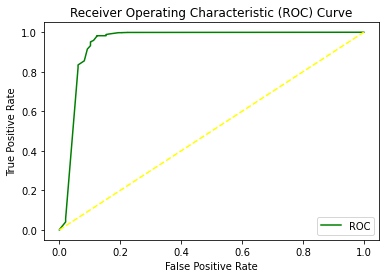

                precision    recall  f1-score   support

    Fraudulent       0.04      0.89      0.07        98
Non_Fraudulent       1.00      0.96      0.98     56864

      accuracy                           0.96     56962
     macro avg       0.52      0.92      0.52     56962
  weighted avg       1.00      0.96      0.98     56962



0.9499381984082321

In [49]:
# Building model with SMOTE

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_sm = dt.fit(X_sm,y_sm)

#Plotting ROC
clf_score(dt_sm)

#### Decision Tree on Adasyn

AUC: 0.95


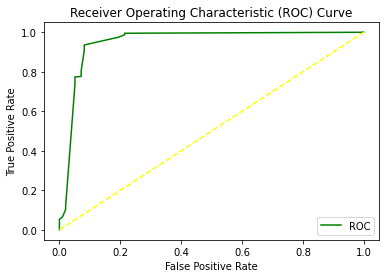

                precision    recall  f1-score   support

    Fraudulent       0.02      0.92      0.04        98
Non_Fraudulent       1.00      0.91      0.96     56864

      accuracy                           0.91     56962
     macro avg       0.51      0.92      0.50     56962
  weighted avg       1.00      0.91      0.95     56962



0.950064080570326

In [50]:
# Building model with ADASYN

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_ada = dt.fit(X_ada,y_ada)

#Plotting ROC
clf_score(dt_ada)

- AUC is higher in SMOTE by a small margin but Recall is better in ADASYN than SMOTE.
- The Precision is extremely low in both, resulting in low f1-score. So the model is not good enough.

### Random Forest Classifier

#### Random Forest on SMOTE 

AUC: 0.98


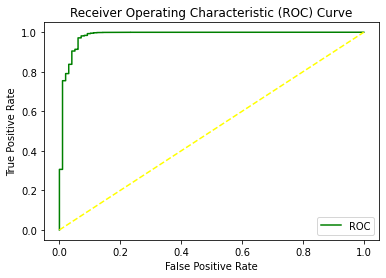

                precision    recall  f1-score   support

    Fraudulent       0.43      0.88      0.58        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.71      0.94      0.79     56962
  weighted avg       1.00      1.00      1.00     56962



0.9838581025403971

In [51]:
#Building Random forest with best parameters on SMOTE
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_sm = rf.fit(X_sm,y_sm)

#Plotting ROC
clf_score(RFC_sm)


#### Random Forest on ADASYN 

AUC: 0.98


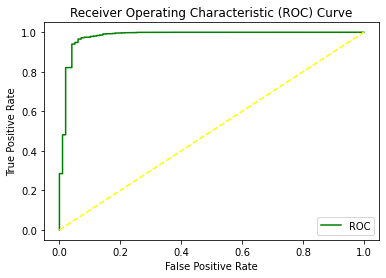

                precision    recall  f1-score   support

    Fraudulent       0.07      0.89      0.13        98
Non_Fraudulent       1.00      0.98      0.99     56864

      accuracy                           0.98     56962
     macro avg       0.54      0.93      0.56     56962
  weighted avg       1.00      0.98      0.99     56962



0.9801778213395655

In [52]:
#Building Random forest with best parameters on ADASYN
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_ada = rf.fit(X_ada,y_ada)

#Plotting ROC
clf_score(RFC_ada)


- Random Forest performs better on SMOTE.
- Both AUC and Recall for Fraud transactions are better on ADASYN sampled data, but Precision is extremely low.
- Where as in SMOTE we have a fair precision with good recall resulting in a fair f1-score(0.57). 

## Choosing the Best Model.

- To save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions but we can not have a very low precision.

- The top two models giving better AUC are KNN (with SMOTE) & Random Forest(with SMOTE).

- Scores of Random Forest model:

          AUC : 0.98 

          Recall: 0.88

          Precision: 0.42

          f1-Score : 0.57

- Scores of KNN model:

          AUC : 0.94 

          Recall: 0.88

          Precision: 0.61

          f1-Score : 0.72

- Comparing both we can see that the Random forest model has more AUC score than KNN but the KNN model has a better f1-score (Which is a result of better precision and recall)

- Though the recall is same in both, having a better precision at a little trade off with AUC score will help the model generalize better. Having a good precision will help preventing a fair transaction being called fraudaulent.

- So the KNN model with SMOTE oversampling is our final model.